**Set up notebook:**

In [1]:
#Configure Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to dataset folder
data_folder = '/content/drive/My Drive/MA/'

Mounted at /content/drive


In [2]:
#Import required libraries for this notebook
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

**Load dataset:**

In [47]:
#Read WTG data
signals = 'wind-farm-1-signals-training.csv'
signals_test = 'wind-farm-1-signals-testing.csv'
all_data = pd.concat([pd.read_csv(data_folder + signals, delimiter=';'), pd.read_csv(data_folder + signals_test, delimiter=';')], ignore_index=True)
all_data['Timestamp'] = pd.to_datetime(all_data['Timestamp'])
all_data.set_index('Timestamp', inplace=True)

#Filter T_01 data out
wtg_data = all_data[all_data.Turbine_ID == 'T11']

#wtg_data = wtg_data[wtg_data['Grd_Prod_Pwr_Avg'] > 0]
print(wtg_data.dtypes)
wtg_data.head()

Turbine_ID                object
Gen_RPM_Max              float64
Gen_RPM_Min              float64
Gen_RPM_Avg              float64
Gen_RPM_Std              float64
                          ...   
Grd_Prod_PsbleCap_Max    float64
Grd_Prod_PsbleCap_Min    float64
Grd_Prod_PsbleCap_Std    float64
Gen_Bear2_Temp_Avg         int64
Nac_Direction_Avg        float64
Length: 82, dtype: object


,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,T11,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,30,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
2016-01-01 00:10:00+00:00,T11,1400.5,1239.8,1303.6,40.2,43.0,59,61,60,30,...,-999.3,-931.3,-1000.0,5.8,999.3,1000.0,931.3,5.8,38,206.9
2016-01-01 00:20:00+00:00,T11,1423.6,1270.8,1344.3,27.2,43.0,60,61,61,30,...,-1000.0,-986.9,-1000.0,0.2,1000.0,1000.0,986.9,0.2,38,206.9
2016-01-01 00:30:00+00:00,T11,1470.1,1258.7,1377.5,48.9,43.0,60,62,61,30,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,38,206.9
2016-01-01 00:40:00+00:00,T11,1539.1,1252.1,1396.2,66.8,43.0,61,62,61,30,...,-999.9,-945.9,-1000.0,1.7,999.9,1000.0,945.9,1.7,39,206.9


In [4]:
wtg_data.tail()

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-12-31 23:10:00+00:00,T11,1509.1,1226.6,1314.6,74.3,42.0,58,59,59,28,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,39,318.2
2017-12-31 23:20:00+00:00,T11,1313.6,1216.0,1252.7,15.6,42.0,58,59,58,28,...,-983.5,-667.1,-1000.0,51.2,983.5,1000.0,667.1,51.2,38,320.5
2017-12-31 23:30:00+00:00,T11,1289.9,1220.4,1250.5,12.7,42.0,57,59,58,28,...,-875.0,-382.9,-1000.0,140.5,875.0,1000.0,382.9,140.5,38,326.3
2017-12-31 23:40:00+00:00,T11,1421.2,1221.0,1268.9,37.3,42.0,57,58,57,28,...,-979.6,-608.4,-1000.0,68.8,979.6,1000.0,608.4,68.8,37,328.2
2017-12-31 23:50:00+00:00,T11,1320.5,1216.8,1262.0,20.6,42.0,56,58,57,28,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,37,331.5


In [48]:
#Read log data
logs = 'wind-farm-1-logs-training.csv'
logs_test = 'wind-farm-1-logs-testing.csv'
log_data = pd.concat([pd.read_csv(data_folder + logs, delimiter=';'), pd.read_csv(data_folder + logs_test, delimiter=';')], ignore_index=True)
log_data['TimeDetected'] = pd.to_datetime(log_data['TimeDetected'])
log_data.set_index('TimeDetected', inplace=True)
log_data = log_data[log_data['UnitTitle'] == 'T11']
log_data.head()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2016-01-01 00:02:18+00:00,NaN,T11,External power ref.:2000kW,NaN
2016-01-01 00:32:18+00:00,NaN,T11,External power ref.:2000kW,NaN
2016-01-01 01:02:18+00:00,NaN,T11,External power ref.:2000kW,NaN
2016-01-01 01:32:17+00:00,NaN,T11,External power ref.:2000kW,NaN
2016-01-01 02:02:17+00:00,NaN,T11,External power ref.:2000kW,NaN


In [6]:
log_data.tail()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2017-12-31 21:30:17+00:00,NaN,T11,External power ref.:2000kW,NaN
2017-12-31 22:00:17+00:00,NaN,T11,External power ref.:2000kW,NaN
2017-12-31 22:30:16+00:00,NaN,T11,External power ref.:2000kW,NaN
2017-12-31 23:00:16+00:00,NaN,T11,External power ref.:2000kW,NaN
2017-12-31 23:30:16+00:00,NaN,T11,External power ref.:2000kW,NaN


In [ ]:
#@title Following failures were reported for the turbine:


In [ ]:
#@title Failure 1: GENERATOR March 3, 2016 7:00 PM Electric circuit error in generator


In [49]:
#NO RELEVANT LOGS FOUND
logs_1 = log_data[log_data.Remark.str.contains('electric', na=False, case=False)].rename(columns={'Remark' : 'Remark_1'})
logs_1

,TimeReset,UnitTitle,Remark_1,UnitTitleDestination
TimeDetected,,,,


In [ ]:
#@title Failure Group 2: HYDRAULIC_GROUP October 17, 2016 5:44 PM Hydraulic group error in the brake circuit; April 26, 2017 6:06 PM Hydraulic group error in the brake circuit; September 12, 2017 3:30 PM Hydraulic group error in the brake circuit


In [50]:
#Logs containing "brake": Hydraulic group error
logs_2 = log_data[log_data.Remark.str.contains('brake', na=False, case=False)].rename(columns={'Remark' : 'Remark_2'})
logs_2

,TimeReset,UnitTitle,Remark_2,UnitTitleDestination
TimeDetected,,,,
2016-10-14 13:51:42+00:00,2016-10-14 14:13:05,T11,"Feedback = 1, Brake",NaN
2016-10-17 17:19:00+00:00,2016-10-18 13:25:02,T11,High temperature brake disc,NaN
2016-10-17 17:33:29+00:00,2016-10-18 13:25:02,T11,High temperature brake disc,NaN
2016-10-18 08:59:45+00:00,NaN,T11,High temperature brake disc,NaN
2017-04-26 15:00:46+00:00,2017-04-26 18:51:51,T11,High temperature brake disc,NaN
2017-09-12 14:40:15+00:00,2017-09-12 15:55:00,T11,High temperature brake disc,NaN


In [51]:
#Create a new column to label the signals: 'F1'/'F2' : Log entry related to 1st/2nd Failure was found during the previous 10 min, 
#'Reported' : Failure reported by the technician at this time, 'None': nothing reported or logged
#Initialize to 'None'
wtg_data['Failure'] = 'None'

#Join with log data for Failure 2
wtg_data = pd.merge_asof(wtg_data, logs_2['Remark_2'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F2'
wtg_data.loc[wtg_data.Remark_2.str.contains('brake', na=False, case=False), 'Failure'] = 'F2'

#Label reported failures
wtg_data.loc['2016-03-03 19:10:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-10-17 17:50:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-04-26 18:10:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-09-12 15:30:00+00:00', 'Failure'] = 'Reported'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
#Validate
wtg_data['2016-10-17' : '2016-10-17'].dropna(subset=['Remark_2'])

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Failure,Remark_2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-17 17:20:00+00:00,T11,1377.6,0.0,412.0,383.7,29.0,31,31,31,37,...,-831.5,107.2,25.6,831.5,0.0,107.2,29,273.9,F2,High temperature brake disc
2016-10-17 17:40:00+00:00,T11,0.0,0.0,0.0,0.0,30.0,31,31,31,36,...,0.0,0.0,0.0,0.0,0.0,0.0,30,280.2,F2,High temperature brake disc


In [53]:
wtg_data = wtg_data[~wtg_data.index.duplicated()]
x='Timestamp'
c1= '#d3d3d3'
style = 'Failure'
hue = 'Failure'
s = 80

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


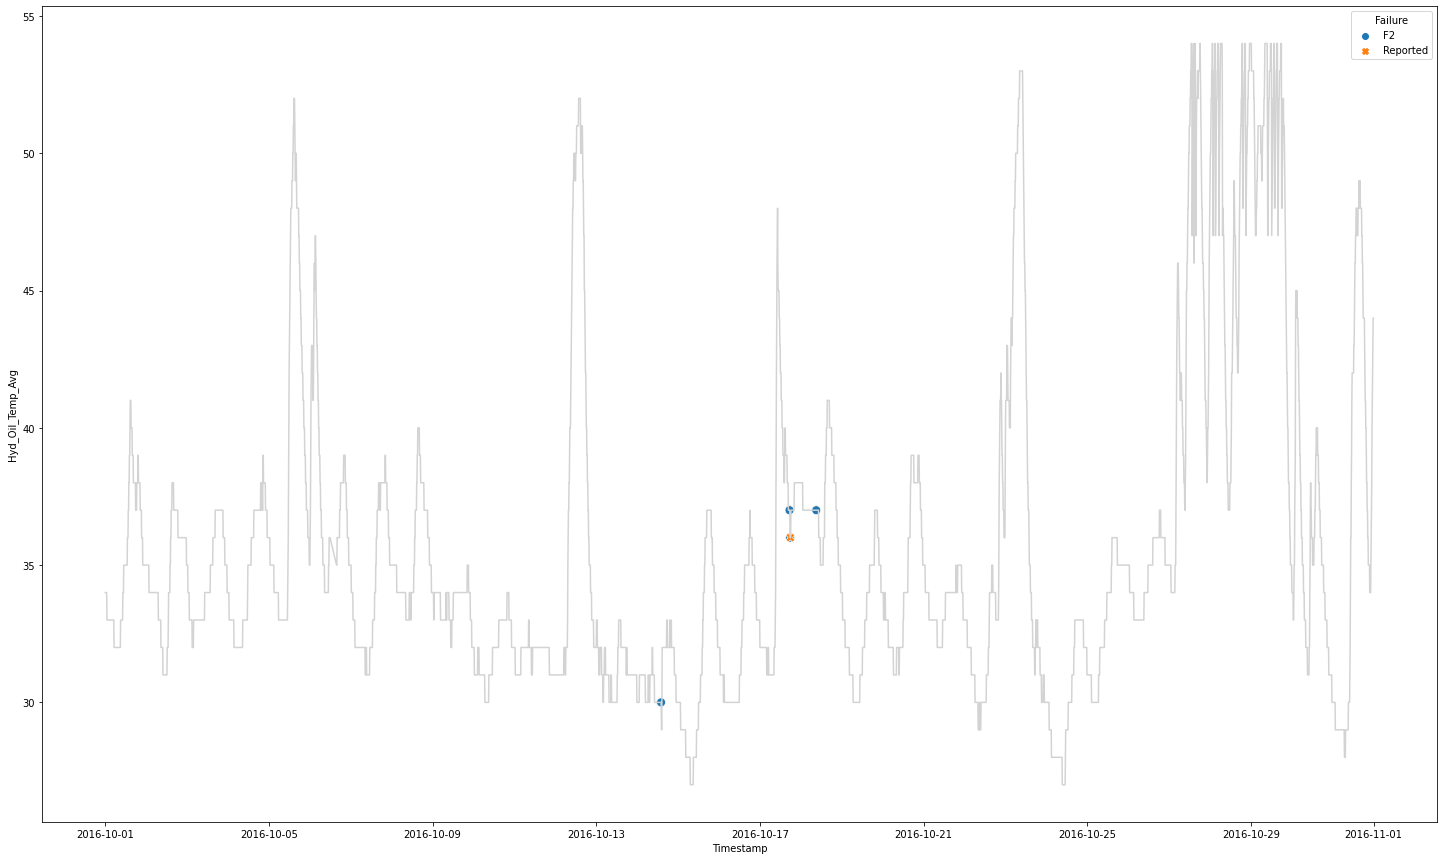

In [54]:
#Visualize Failure 2 (part 1)
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2016-10']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


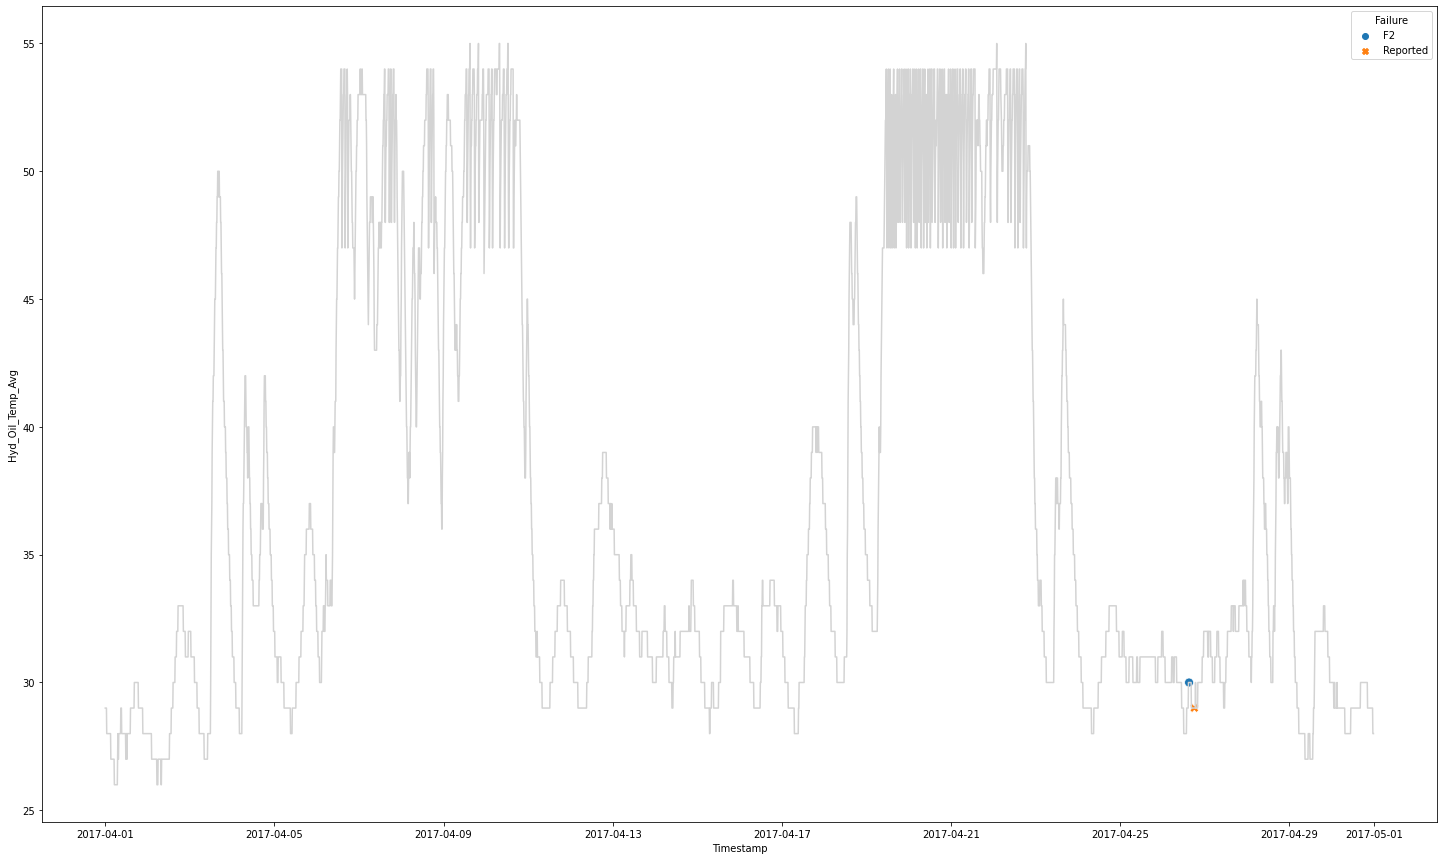

In [55]:
#Visualize Failure 2 (part 2)
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2017-04']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


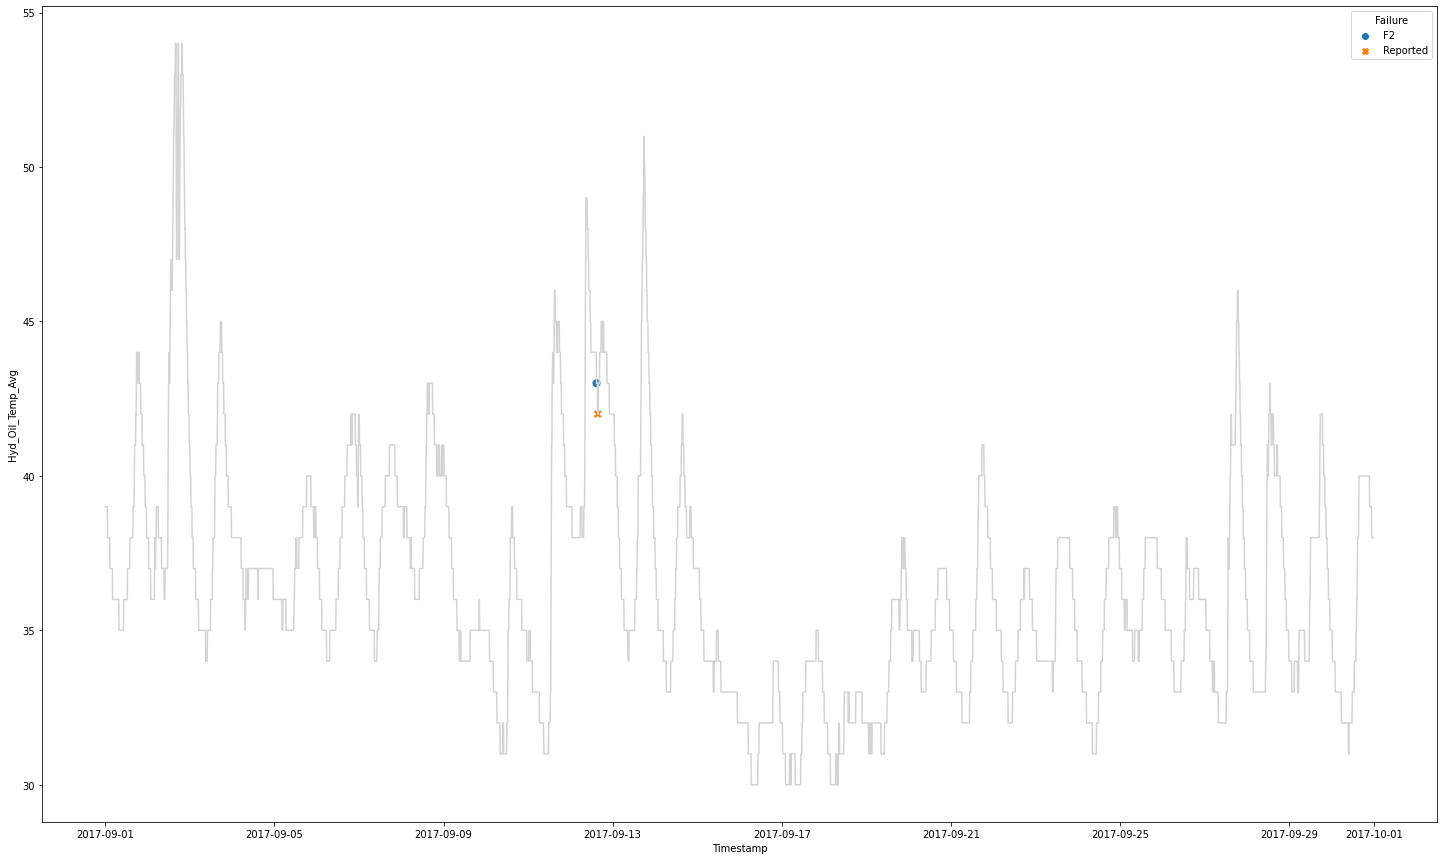

In [56]:
#Visualize Failure 2 (part 3)
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2017-09']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


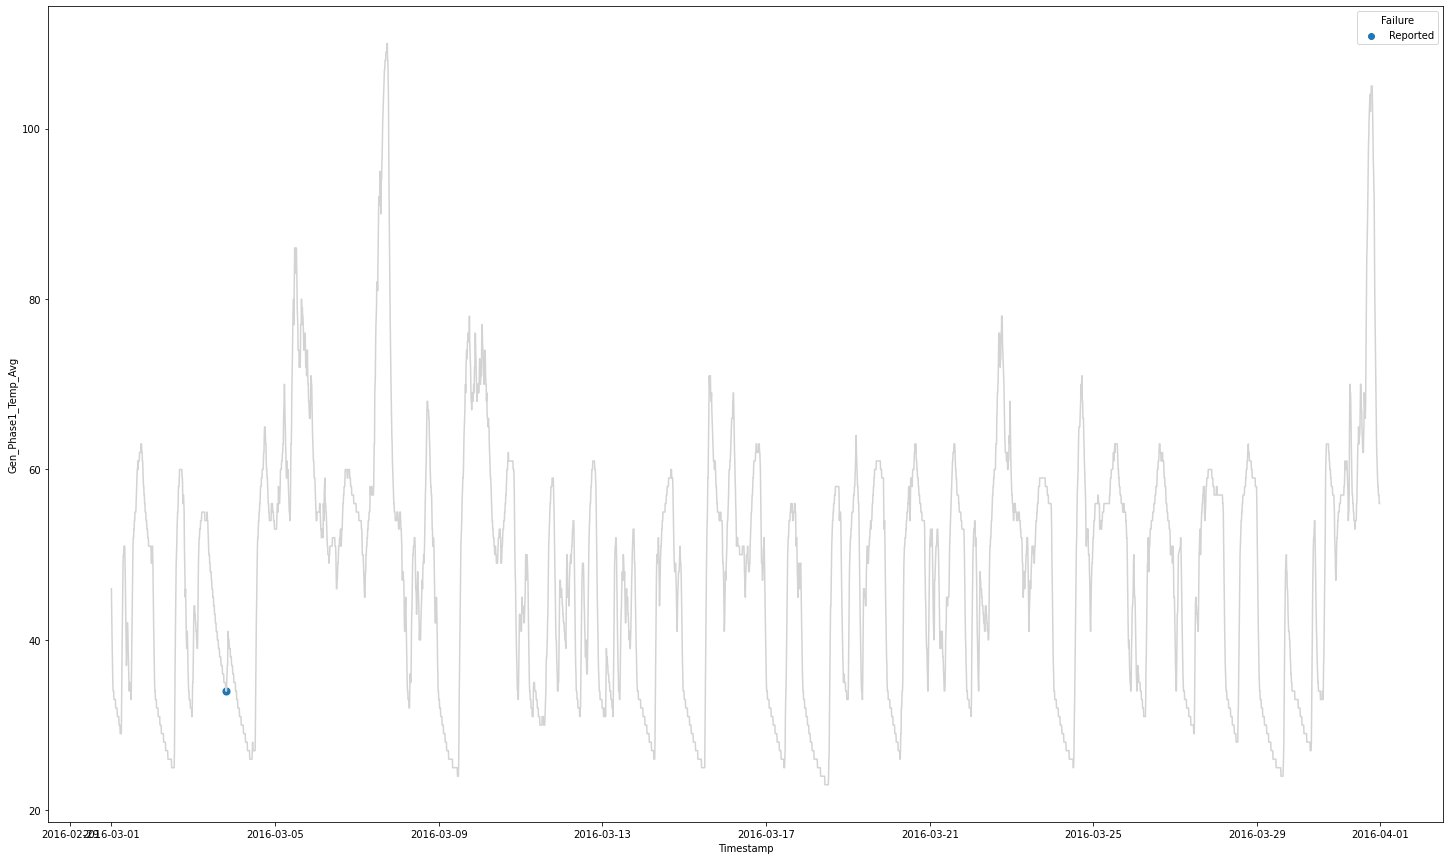

In [57]:
#Visualize Failure 1
y = 'Gen_Phase1_Temp_Avg'
data = wtg_data['2016-03']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])